## 📊 Análise da Mortalidade por Câncer no Brasil (1979–2023)

Analisar a evolução dos óbitos causados por câncer no Brasil entre os anos de 1979 e 2023, com base nos dados do DATASUS.



In [4]:
from google.colab import files
uploaded = files.upload()


Saving mortalidade_cancer.csv to mortalidade_cancer.csv


In [30]:
import pandas as pd

df = pd.read_csv("mortalidade_cancer.csv", sep=';', encoding='latin1', skiprows=2)
df.head()


,ANO,OBITO_TOTAL,OBITO_CANCER,PERCENTUAL
0,1979,711742,56319,"7,91"
1,1980,750727,59748,"7,96"
2,1981,750276,61726,"8,23"
3,1982,741614,63555,"8,57"
4,1983,771203,66168,"8,58"


In [31]:
# CONVERTER COLUNAS (caso PERCENTUAL esteja como texto com vírgula)
df['PERCENTUAL'] = df['PERCENTUAL'].str.replace(',', '.').astype(float)

# GARANTIR QUE O ANO É INTEIRO
df['ANO'] = df['ANO'].astype(int)

📉 Comparação total de óbitos vs. óbitos por câncer

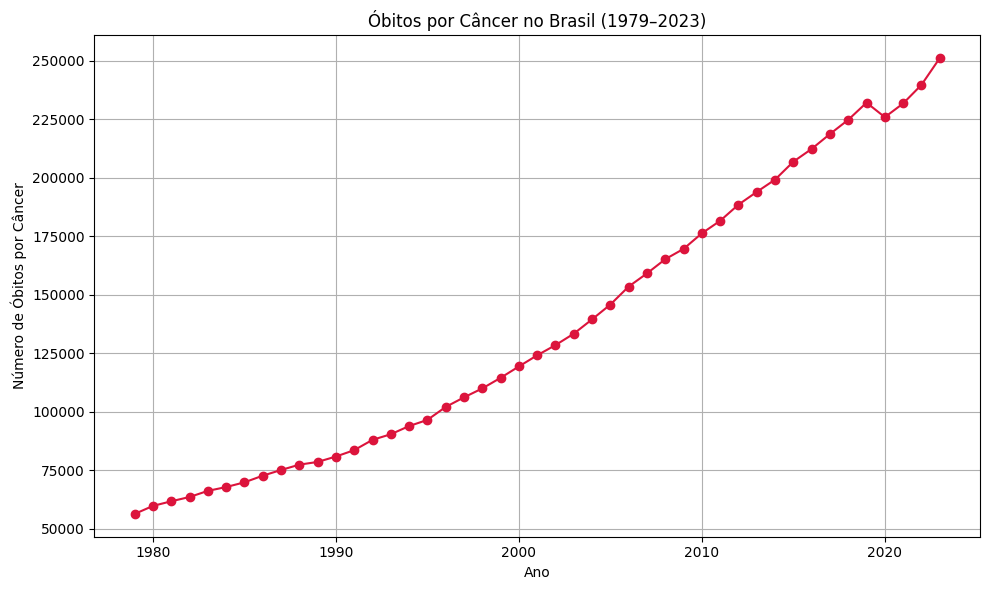

In [37]:
# GRÁFICO 1 - Óbitos por Câncer por Ano

plt.figure(figsize=(10, 6))
plt.plot(df['ANO'], df['OBITO_CANCER'], marker='o', color='crimson')
plt.title('Óbitos por Câncer no Brasil (1979–2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos por Câncer')
plt.grid(True)
plt.tight_layout()
plt.show()


Enquanto o número total de óbitos cresce moderadamente, os óbitos por câncer aumentam em ritmo mais acelerado. Isso reforça a importância do câncer como prioridade nas políticas de saúde pública.



📊 Participação do câncer no total de óbitos

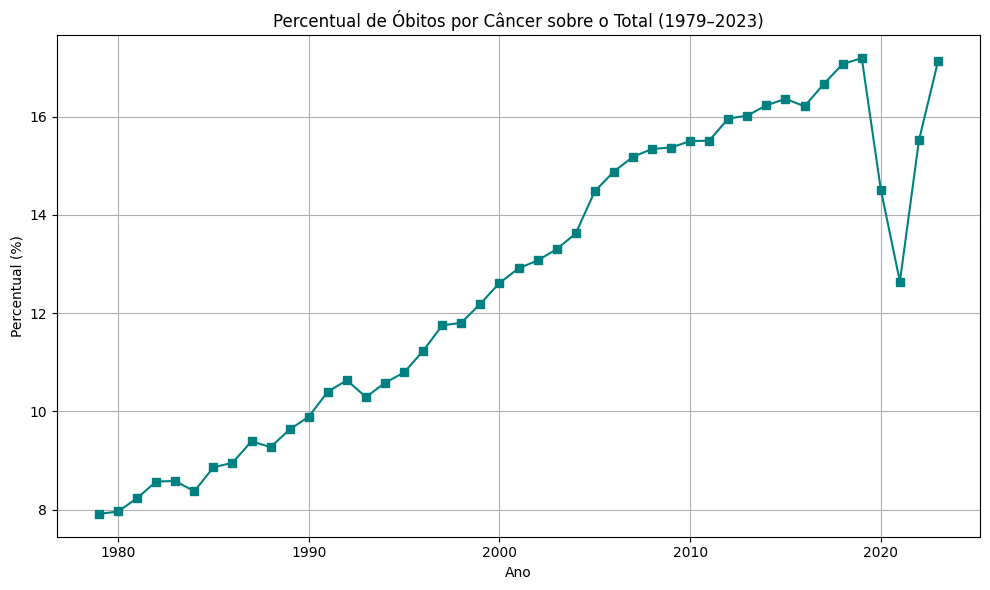

In [33]:
# GRÁFICO 2 - Percentual de Óbitos por Câncer
plt.figure(figsize=(10, 6))
plt.plot(df['ANO'], df['PERCENTUAL'], marker='s', color='teal')
plt.title('Percentual de Óbitos por Câncer sobre o Total (1979–2023)')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


A porcentagem de óbitos causados por câncer em relação ao total de mortes praticamente dobrou no período. Isso indica que o câncer vem se tornando uma das principais causas de morte no Brasil.

📉 Comparação total de óbitos vs. óbitos por câncer

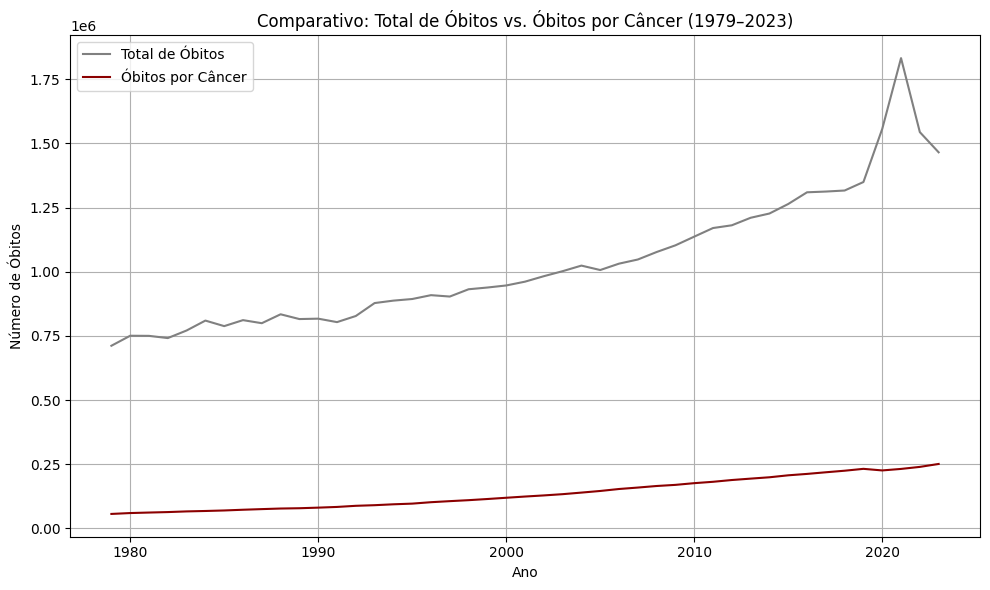

In [34]:
# GRÁFICO 3 - Comparação Total de Óbitos x Óbitos por Câncer
plt.figure(figsize=(10, 6))
plt.plot(df['ANO'], df['OBITO_TOTAL'], label='Total de Óbitos', color='gray')
plt.plot(df['ANO'], df['OBITO_CANCER'], label='Óbitos por Câncer', color='darkred')
plt.title('Comparativo: Total de Óbitos vs. Óbitos por Câncer (1979–2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Enquanto o número total de óbitos cresce moderadamente, os óbitos por câncer aumentam em ritmo mais acelerado. Isso reforça a importância do câncer como prioridade nas políticas de saúde pública.

## Os dados evidenciam que o câncer representa um desafio crescente para o sistema de saúde brasileiro. A análise histórica mostra não apenas o aumento de casos, mas também a relevância crescente do câncer como causa de mortalidade.

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Garantir que ANO seja numérico e em formato correto
X = df[['ANO']]  # variável independente
y = df['OBITO_CANCER']  # variável dependente


In [39]:
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [40]:
# Gerar anos futuros
anos_futuros = np.arange(1979, 2031).reshape(-1, 1)
previsoes = modelo.predict(anos_futuros)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


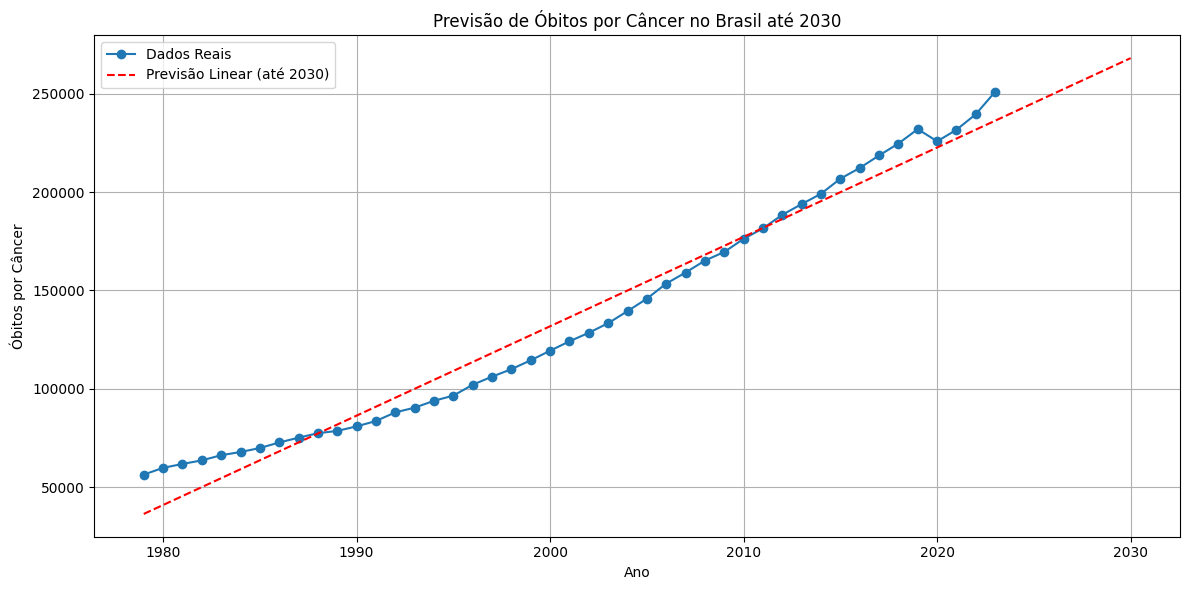

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df['ANO'], df['OBITO_CANCER'], label='Dados Reais', marker='o')
plt.plot(anos_futuros, previsoes, label='Previsão Linear (até 2030)', linestyle='--', color='red')
plt.title('Previsão de Óbitos por Câncer no Brasil até 2030')
plt.xlabel('Ano')
plt.ylabel('Óbitos por Câncer')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Prever o valor para o ano de 2030
ano_2030 = np.array([[2030]])
previsao_2030 = modelo.predict(ano_2030)

print(f"A previsão de óbitos por câncer para o ano de 2030 é: {int(previsao_2030[0]):,}".replace(',', '.'))

A previsão de óbitos por câncer para o ano de 2030 é: 268.157


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Se a tendência atual se mantiver, espera-se que os óbitos por câncer no Brasil ultrapassem 268.157 mil em 2030, conforme estimado por regressão linear simples.